## First Passage Probabilities and Expected Steps in a 4-State Markov Chain

In [2]:
import numpy as np
import pandas as pd
from sympy import symbols, Eq, solve

# Define the transition matrix
states = [1, 2, 3, 4]
P = np.array([
    [1.0, 0.0, 0.0, 0.0],
    [0.3, 0.2, 0.4, 0.1],
    [0.0, 0.4, 0.1, 0.5],
    [0.0, 0.3, 0.5, 0.2]
])

# Display transition matrix using pandas DataFrame
df_P = pd.DataFrame(P, index=[f"State {s}" for s in states], columns=[f"To {s}" for s in states])
print("Transition Matrix:")
print(df_P)

# First passage probabilities: f_32 and f_42
f32, f42 = symbols('f32 f42')
eq1 = Eq(f32, 0.4 + 0.1*f32 + 0.5*f42)
eq2 = Eq(f42, 0.3 + 0.5*f32 + 0.2*f42)
solution_f = solve((eq1, eq2), (f32, f42))

# Expected steps to reach state 2: m_3 and m_4
m3, m4 = symbols('m3 m4')
eq3 = Eq(m3, 1 + 0.1*m3 + 0.5*m4)
eq4 = Eq(m4, 1 + 0.5*m3 + 0.2*m4)
solution_m = solve((eq3, eq4), (m3, m4))

# Show results
results = pd.DataFrame({
    'Metric': ['f_32', 'f_42', 'm_3 (expected steps to state 2)', 'm_4 (expected steps to state 2)'],
    'Value': [
        float(solution_f[f32].evalf()),
        float(solution_f[f42].evalf()),
        float(solution_m[m3].evalf()),
        float(solution_m[m4].evalf())
    ]
})

print("\nResults:")
print(results)

Transition Matrix:
         To 1  To 2  To 3  To 4
State 1   1.0   0.0   0.0   0.0
State 2   0.3   0.2   0.4   0.1
State 3   0.0   0.4   0.1   0.5
State 4   0.0   0.3   0.5   0.2

Results:
                            Metric     Value
0                             f_32  1.000000
1                             f_42  1.000000
2  m_3 (expected steps to state 2)  2.765957
3  m_4 (expected steps to state 2)  2.978723


## Graph Visualization

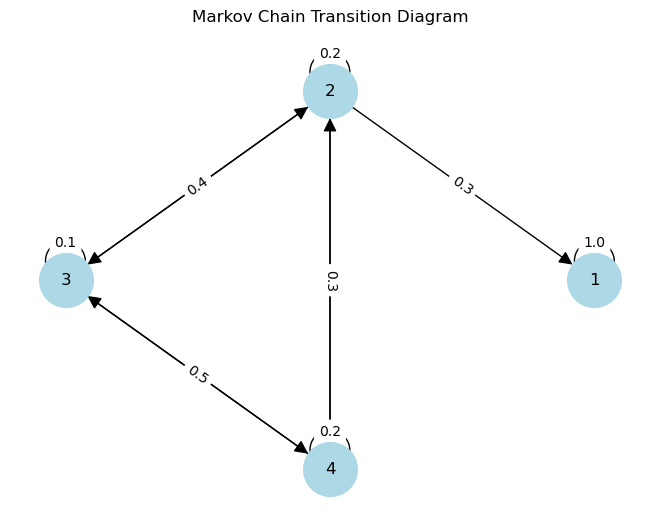

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create directed graph
G = nx.DiGraph()

# Add edges with probabilities > 0
for i, from_state in enumerate(states):
    for j, to_state in enumerate(states):
        prob = P[i][j]
        if prob > 0:
            G.add_edge(from_state, to_state, weight=prob)

# Position nodes in a circular layout
pos = nx.circular_layout(G)

# Draw the graph
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.1f}" for k, v in edge_labels.items()})

plt.title("Markov Chain Transition Diagram")
plt.show()